In [69]:
import numpy as np
import h5py
from matplotlib import pyplot as plt


In [70]:

def h5_load_fields (FileName1, EorH, freq_num, is_forward_field: bool = True, coo=0):
    # output: target field = adjoint field^* <- in this case, you should set "is_forward_field = False"
    if EorH == 'E':
        R_coo=['ex_'+str(freq_num)+'.r','ey_'+str(freq_num)+'.r','ez_'+str(freq_num)+'.r']
        I_coo=['ex_'+str(freq_num)+'.i','ey_'+str(freq_num)+'.i','ez_'+str(freq_num)+'.i']
    if EorH == 'H':
        R_coo=['hx_'+str(freq_num)+'.r','hy_'+str(freq_num)+'.r','hz_'+str(freq_num)+'.r']
        I_coo=['hx_'+str(freq_num)+'.i','hy_'+str(freq_num)+'.i','hz_'+str(freq_num)+'.i']
    if EorH != 'E'and EorH !='H':
        print('enter ''E'' or ''H''')
        return None
        
    # Load DFT Field
    # print(FileName1)
    hf = h5py.File(FileName1, 'r')
    A=hf.get(R_coo[coo])
    R=np.array(A) # Real value

    B=hf.get(I_coo[coo])
    I=np.array(B)*1j # Imaginary value

    Field=R+I # Complex field

    
    if is_forward_field:
        return Field

    else:
        return np.conjugate(Field)


def load_target_field (is_consider_Ex_only: bool = True):
    # 
    # Ex_Nameo_x=f"Ex_field_output_{i}_x.h5"
    # Ex_Nameo_y=f"Ex_field_output_{i}_y.h5"
    # Ex=h5_load_fields(Ex_Nameo_x,Ex_Nameo_y,0)

    # Ey_Nameo_x=f"Ey_field_output_{i}_x.h5"
    # Ey_Nameo_y=f"Ey_field_output_{i}_y.h5"
    # Ey=h5_load_fields(Ey_Nameo_x,Ey_Nameo_y,CP,1)

    # Ez_Nameo_x=f"Ez_field_output_{i}_x.h5"
    # Ez_Nameo_y=f"Ez_field_output_{i}_y.h5"
    # Ez=h5_load_fields(Ez_Nameo_x,Ez_Nameo_y)

    if is_consider_Ex_only:
        Ex_Name=f"Ex_field.h5"
        E_x=h5_load_fields(Ex_Name)

        return [E_x]

    else:
        Ex_Name=f"Ex_field.h5"
        E_x=h5_load_fields(Ex_Name)

        Ey_Name=f"Ey_field.h5"
        E_y=h5_load_fields(Ey_Name, coo=1)

        Ez_Name=f"Ez_field.h5"
        E_z=h5_load_fields(Ez_Name, coo=2)

        return [E_x, E_y, E_z]

    

In [88]:
folder_name= '9_field_output_33s_digit'
L_RCP_flux, L_LCP_flux, LCP_flux_empty = [], [], []
fcen, width, n_freq = 1/0.68, 0.25, 100
freq_array = np.linspace(fcen-0.5*fcen*width, fcen+0.5*fcen*width, n_freq)
for i in range(n_freq):
    L_RCP_flux.append(
    np.sum(-np.real((h5_load_fields(folder_name+"/sim_L_bot.h5",'E',i,False,0) + 1j*h5_load_fields(folder_name+"/sim_L_bot.h5",'E',i,False,1))*
    (h5_load_fields(folder_name+"/sim_L_bot.h5",'H',i,True,1) + 1j*h5_load_fields(folder_name+"/sim_L_bot.h5",'H',i,True,0)))))
    L_LCP_flux.append(
    np.sum(-np.real((h5_load_fields(folder_name+"/sim_L_bot.h5",'E',i,False,0) - 1j*h5_load_fields(folder_name+"/sim_L_bot.h5",'E',i,False,1))*
    (h5_load_fields(folder_name+"/sim_L_bot.h5",'H',i,True,1) - 1j*h5_load_fields(folder_name+"/sim_L_bot.h5",'H',i,True,0)))))
    LCP_flux_empty.append(
    np.sum(-np.real((h5_load_fields(folder_name+"/sim_L_empty_top.h5",'E',i,False,0) - 1j*h5_load_fields(folder_name+"/sim_L_empty_top.h5",'E',i,False,1))*
    (h5_load_fields(folder_name+"/sim_L_empty_top.h5",'H',i,True,1) - 1j*h5_load_fields(folder_name+"/sim_L_empty_top.h5",'H',i,True,0)))))

0.0177313223520405
0.5010285545576567


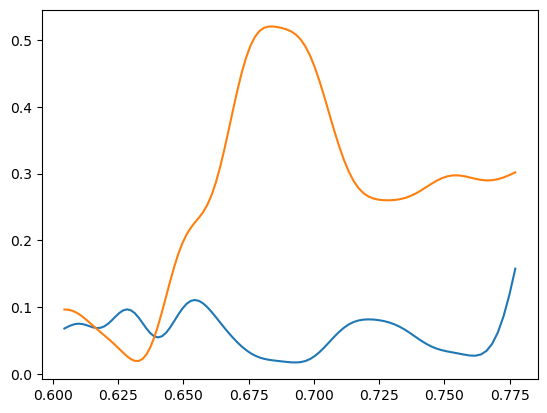

In [89]:
plt.plot(1/freq_array,np.array(L_LCP_flux)/np.array(LCP_flux_empty))
plt.plot(1/freq_array,np.array(L_RCP_flux)/np.array(LCP_flux_empty))

plt.plot()

print((np.array(L_LCP_flux)/np.array(LCP_flux_empty))[41])
print((np.array(L_RCP_flux)/np.array(LCP_flux_empty))[41])

In [90]:
R_RCP_flux, R_LCP_flux, RCP_flux_empty = [], [], []
fcen, width, n_freq = 1/0.68, 0.25, 100
freq_array = np.linspace(fcen-0.5*fcen*width, fcen+0.5*fcen*width, n_freq)
for i in range(n_freq):
    R_RCP_flux.append(
    np.sum(-np.real((h5_load_fields(folder_name+"/sim_R_bot.h5",'E',i,False,0) + 1j*h5_load_fields(folder_name+"/sim_R_bot.h5",'E',i,False,1))*
    (h5_load_fields(folder_name+"/sim_R_bot.h5",'H',i,True,1) + 1j*h5_load_fields(folder_name+"/sim_R_bot.h5",'H',i,True,0)))))
    R_LCP_flux.append(
    np.sum(-np.real((h5_load_fields(folder_name+"/sim_R_bot.h5",'E',i,False,0) - 1j*h5_load_fields(folder_name+"/sim_R_bot.h5",'E',i,False,1))*
    (h5_load_fields(folder_name+"/sim_R_bot.h5",'H',i,True,1) - 1j*h5_load_fields(folder_name+"/sim_R_bot.h5",'H',i,True,0)))))
    RCP_flux_empty.append(
    np.sum(-np.real((h5_load_fields(folder_name+"/sim_R_empty_top.h5",'E',i,False,0) + 1j*h5_load_fields(folder_name+"/sim_R_empty_top.h5",'E',i,False,1))*
    (h5_load_fields(folder_name+"/sim_R_empty_top.h5",'H',i,True,1) + 1j*h5_load_fields(folder_name+"/sim_R_empty_top.h5",'H',i,True,0)))))

0.039230391564346975
0.04428069063013783


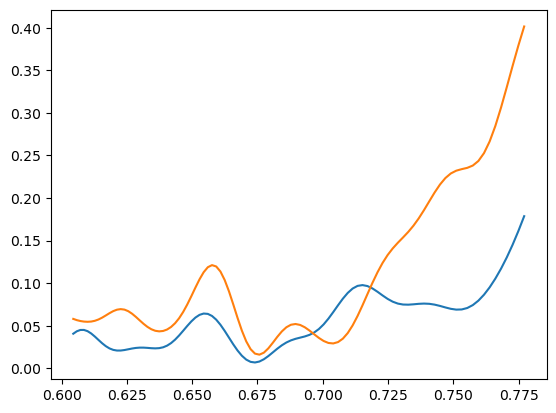

In [91]:
plt.plot(1/freq_array,np.array(R_LCP_flux)/np.array(RCP_flux_empty))
plt.plot(1/freq_array,np.array(R_RCP_flux)/np.array(RCP_flux_empty))

plt.plot()

print((np.array(R_LCP_flux)/np.array(RCP_flux_empty))[41])
print((np.array(R_RCP_flux)/np.array(RCP_flux_empty))[41])

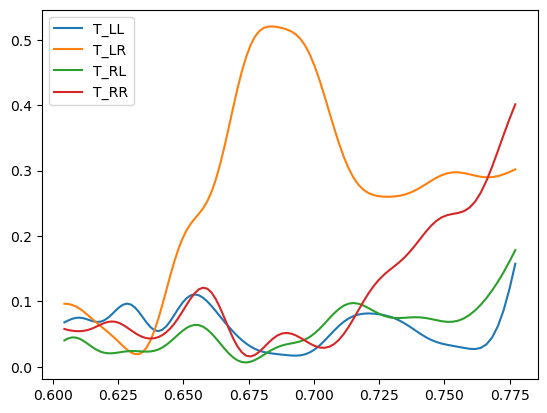

In [92]:
plt.plot(1/freq_array,np.array(L_LCP_flux)/np.array(LCP_flux_empty))
plt.plot(1/freq_array,np.array(L_RCP_flux)/np.array(LCP_flux_empty))
plt.plot(1/freq_array,np.array(R_LCP_flux)/np.array(RCP_flux_empty))
plt.plot(1/freq_array,np.array(R_RCP_flux)/np.array(RCP_flux_empty))
plt.legend(['T_LL', 'T_LR', 'T_RL', 'T_RR'])

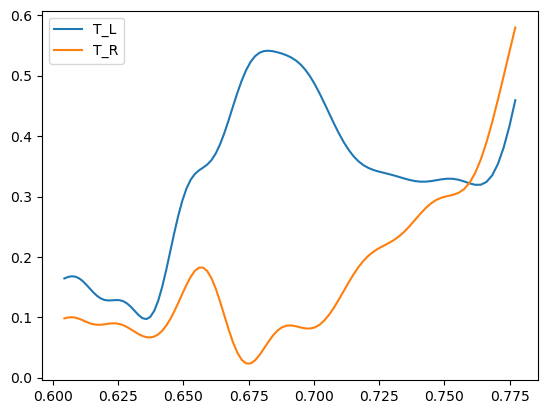

In [102]:
plt.plot(1/freq_array,np.array(L_LCP_flux)/np.array(LCP_flux_empty)+np.array(L_RCP_flux)/np.array(LCP_flux_empty))
plt.plot(1/freq_array,np.array(R_LCP_flux)/np.array(RCP_flux_empty)+np.array(R_RCP_flux)/np.array(RCP_flux_empty))
plt.legend(['T_L', 'T_R'])
flux_L = np.loadtxt("flux_L_sim.txt")
flux_R = np.loadtxt("flux_R_sim.txt")
# plt.plot(1/flux_L[0,:],flux_L[1,:])
# plt.plot(1/flux_R[0,:],flux_R[1,:])